<a href="https://colab.research.google.com/github/vihanga-induwara/new-Bank-Marketing/blob/main/new_CM2604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Load and Import Libraries**

# **2. Load the Dataset**

In [ ]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/vihanga-induwara/Bank-Marketing/main/bank%2Bmarketing/bank-additional/bank-additional/bank-additional-full.csv", sep=";")


# **3. Explore the Dataset**

## **Inspect the first few rows with .head().**

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## **Check for missing values using .isnull().sum()**

In [ ]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


## **Check for class imbalance using .value_counts() on the target variable.**

In [ ]:
data['y'].value_counts()

,count
y,
no,36548
yes,4640


## **Use .describe() for statistical overview of the dataset.**

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## **Examine feature types (categorical, continuous) using .dtypes.**

In [ ]:
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


# **4. Data Preprocessing**

## **4.1 Each colum Data Preprocessing**

### **01.age - Client's age (numeric)**

In [ ]:
data["age"].value_counts()

,count
age,
31,1947
32,1846
33,1833
36,1780
35,1759
...,...
89,2
91,2
94,1


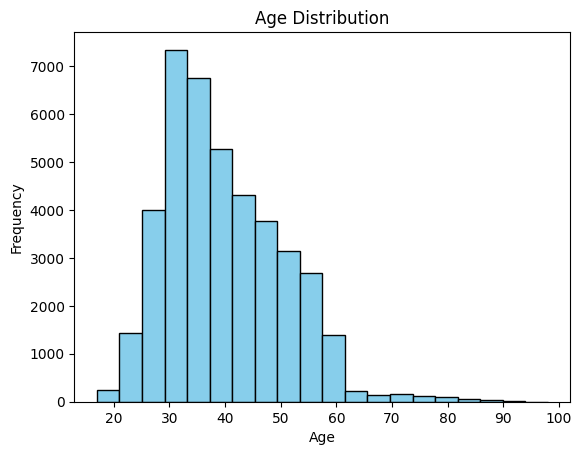

In [ ]:
import matplotlib.pyplot as plt

# Basic histogram for age distribution
plt.hist(data["age"], bins=20, color="skyblue", edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [ ]:
import pandas as pd

# Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Filter the data to exclude outliers
data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

# Print the shape of the dataset before and after removing outliers
print(f"Original data shape: {data.shape}")
print(f"Data shape after removing outliers: {data.shape}")

Lower Bound: 9.5, Upper Bound: 69.5
Original data shape: (40719, 21)
Data shape after removing outliers: (40719, 21)


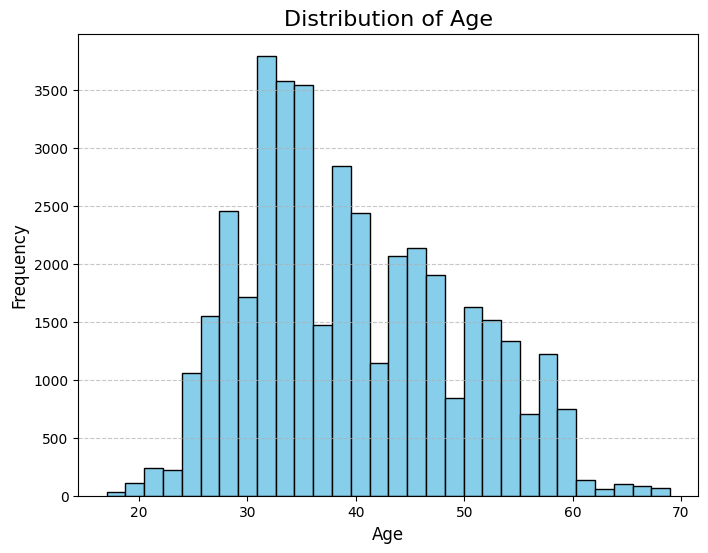

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data["age"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler instance
scaler = MinMaxScaler()

# Normalize the 'age' column
data['age'] = scaler.fit_transform(data[['age']])

# Display the first few rows of the normalized column
print(data[['age']].head())

        age
0  0.750000
1  0.769231
2  0.384615
3  0.442308
4  0.750000


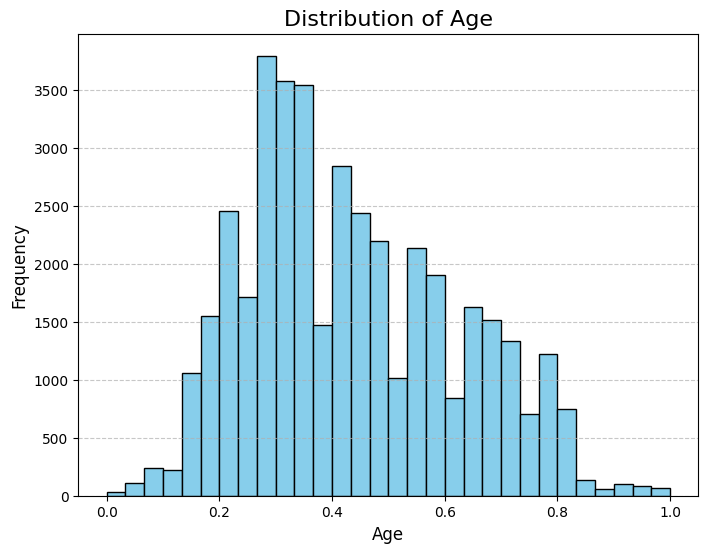

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data["age"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **02.job - Type of job (categorical).**

In [ ]:
data["job"].value_counts()

,count
job,
admin.,10414
blue-collar,9251
technician,6742
services,3969
management,2918
entrepreneur,1456
self-employed,1420
retired,1301
housemaid,1035


In [ ]:
import pandas as pd

data_encoded = pd.get_dummies(data['job'], prefix='job', drop_first=False)

data = pd.concat([data, data_encoded], axis=1)

# Display the first few rows of the updated dataframe
print(data.head(2))

        age        job  marital    education  default housing loan    contact  \
0  0.750000  housemaid  married     basic.4y       no      no   no  telephone   
1  0.769231   services  married  high.school  unknown      no   no  telephone   

  month day_of_week  ...  job_entrepreneur  job_housemaid  job_management  \
0   may         mon  ...             False           True           False   
1   may         mon  ...             False          False           False   

   job_retired job_self-employed  job_services  job_student  job_technician  \
0        False             False         False        False           False   
1        False             False          True        False           False   

   job_unemployed  job_unknown  
0           False        False  
1           False        False  

[2 rows x 33 columns]


In [ ]:
# Drop the 'job' column in-place
data.drop(columns=['job'], inplace=True)

# Verify if the column is removed
print(data.head())

        age  marital    education  default housing loan    contact month  \
0  0.750000  married     basic.4y       no      no   no  telephone   may   
1  0.769231  married  high.school  unknown      no   no  telephone   may   
2  0.384615  married  high.school       no     yes   no  telephone   may   
3  0.442308  married     basic.6y       no      no   no  telephone   may   
4  0.750000  married  high.school       no      no  yes  telephone   may   

  day_of_week  duration  ...  job_entrepreneur  job_housemaid  job_management  \
0         mon       261  ...             False           True           False   
1         mon       149  ...             False          False           False   
2         mon       226  ...             False          False           False   
3         mon       151  ...             False          False           False   
4         mon       307  ...             False          False           False   

  job_retired  job_self-employed  job_services  job_stud

### **03.marital - Marital status (categorical).**

In [ ]:
data["marital"].value_counts()

,count
marital,
married,24610
single,11553
divorced,4476
unknown,80


In [ ]:
# Replace unknown with the most frequent category
most_frequent_marital = data['marital'].mode()[0]
data['marital'].replace('unknown', most_frequent_marital, inplace=True)

In [ ]:
data["marital"].value_counts()

,count
marital,
married,24690
single,11553
divorced,4476


In [ ]:
# One-hot encode the 'marital' column
data = pd.get_dummies(data, columns=['marital'], drop_first=True)

# Check the result
print(data.head())

        age    education  default housing loan    contact month day_of_week  \
0  0.750000     basic.4y       no      no   no  telephone   may         mon   
1  0.769231  high.school  unknown      no   no  telephone   may         mon   
2  0.384615  high.school       no     yes   no  telephone   may         mon   
3  0.442308     basic.6y       no      no   no  telephone   may         mon   
4  0.750000  high.school       no      no  yes  telephone   may         mon   

   duration  campaign  ...  job_management  job_retired job_self-employed  \
0       261         1  ...           False        False             False   
1       149         1  ...           False        False             False   
2       226         1  ...           False        False             False   
3       151         1  ...           False        False             False   
4       307         1  ...           False        False             False   

   job_services  job_student  job_technician  job_unemployed  

### **04.education - Education level (categorical).**

In [ ]:
data["education"].value_counts()

,count
education,
university.degree,12105
high.school,9481
basic.9y,6018
professional.course,5201
basic.4y,3935
basic.6y,2279
unknown,1683
illiterate,17


In [ ]:
# Find the most frequent category in the 'education' column
most_frequent_education = data['education'].mode()[0]

# Replace 'unknown' with the most frequent category
data['education'] = data['education'].replace('unknown', most_frequent_education)

In [ ]:
# Check the value counts after replacement
print(data['education'].value_counts())

education
university.degree      13788
high.school             9481
basic.9y                6018
professional.course     5201
basic.4y                3935
basic.6y                2279
illiterate                17
Name: count, dtype: int64


In [ ]:
# One-hot encode the 'education' column
education_encoded = pd.get_dummies(data['education'], prefix='education')

# Join the one-hot encoded columns back to the original DataFrame
data = pd.concat([data, education_encoded], axis=1)

# Drop the original 'education' column
data.drop('education', axis=1, inplace=True)

# Print the updated DataFrame
print(data.head())

        age  default housing loan    contact month day_of_week  duration  \
0  0.750000       no      no   no  telephone   may         mon       261   
1  0.769231  unknown      no   no  telephone   may         mon       149   
2  0.384615       no     yes   no  telephone   may         mon       226   
3  0.442308       no      no   no  telephone   may         mon       151   
4  0.750000       no      no  yes  telephone   may         mon       307   

   campaign  pdays  ...  job_unknown marital_married  marital_single  \
0         1    999  ...        False            True           False   
1         1    999  ...        False            True           False   
2         1    999  ...        False            True           False   
3         1    999  ...        False            True           False   
4         1    999  ...        False            True           False   

   education_basic.4y  education_basic.6y  education_basic.9y  \
0                True               False    

### **05.default - Has credit in default? (binary).**

In [ ]:
data["default"].value_counts()

,count
default,
no,32162
unknown,8554
yes,3


In [ ]:
# Drop the 'default' column if it doesn't provide useful information
data = data.drop('default', axis=1)

# Check the remaining columns
print(data.columns)

Index(['age', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree'],
      dtype='object')


### **06.balance - Average yearly balance in euros (numeric).**

### **07.housing - Has housing loan? (binary).**

In [ ]:
data["housing"].value_counts()

,count
housing,
yes,21319
no,18419
unknown,981


In [ ]:
# Replace 'unknown' with the most frequent value ('yes')
data['housing'] = data['housing'].replace('unknown', 'yes')

# Check the updated value counts
print(data['housing'].value_counts())

housing
yes    22300
no     18419
Name: count, dtype: int64


In [ ]:
# One-hot encode the 'housing' column
housing_encoded = pd.get_dummies(data['housing'], prefix='housing')

# Join the encoded columns back to the original dataframe
data = pd.concat([data, housing_encoded], axis=1)

# Drop the original 'housing' column if it's no longer needed
data = data.drop(columns=['housing'])

# Check the updated dataframe
print(data.head())

        age loan    contact month day_of_week  duration  campaign  pdays  \
0  0.750000   no  telephone   may         mon       261         1    999   
1  0.769231   no  telephone   may         mon       149         1    999   
2  0.384615   no  telephone   may         mon       226         1    999   
3  0.442308   no  telephone   may         mon       151         1    999   
4  0.750000  yes  telephone   may         mon       307         1    999   

   previous     poutcome  ...  marital_single  education_basic.4y  \
0         0  nonexistent  ...           False                True   
1         0  nonexistent  ...           False               False   
2         0  nonexistent  ...           False               False   
3         0  nonexistent  ...           False               False   
4         0  nonexistent  ...           False               False   

   education_basic.6y  education_basic.9y  education_high.school  \
0               False               False                  F

### **08.loan - Has personal loan? (binary).**

In [ ]:
data["loan"].value_counts()

,count
loan,
no,33560
yes,6178
unknown,981


In [ ]:
# Replace 'unknown' with the most frequent value ('yes')
data['loan'] = data['loan'].replace('unknown', 'yes')

# Check the updated value counts
print(data['loan'].value_counts())

loan
no     33560
yes     7159
Name: count, dtype: int64


In [ ]:
# One-hot encode the 'loan' column
loan_encoded = pd.get_dummies(data['loan'], prefix='loan')

# Join the encoded columns back to the original dataframe
data = pd.concat([data, loan_encoded], axis=1)

# Drop the original 'loan' column if it's no longer needed
data = data.drop(columns=['loan'])

# Check the updated dataframe
print(data.head())

        age    contact month day_of_week  duration  campaign  pdays  previous  \
0  0.750000  telephone   may         mon       261         1    999         0   
1  0.769231  telephone   may         mon       149         1    999         0   
2  0.384615  telephone   may         mon       226         1    999         0   
3  0.442308  telephone   may         mon       151         1    999         0   
4  0.750000  telephone   may         mon       307         1    999         0   

      poutcome  emp.var.rate  ...  education_basic.6y  education_basic.9y  \
0  nonexistent           1.1  ...               False               False   
1  nonexistent           1.1  ...               False               False   
2  nonexistent           1.1  ...               False               False   
3  nonexistent           1.1  ...                True               False   
4  nonexistent           1.1  ...               False               False   

   education_high.school  education_illiterate edu

### **09.contact - Communication type for last contact (categorical).**

In [ ]:
data["contact"].value_counts()

,count
contact,
cellular,25724
telephone,14995


In [ ]:
# Drop the 'contact' column
data = data.drop(columns=['contact'])

# Check the updated dataframe
print(data.head())

        age month day_of_week  duration  campaign  pdays  previous  \
0  0.750000   may         mon       261         1    999         0   
1  0.769231   may         mon       149         1    999         0   
2  0.384615   may         mon       226         1    999         0   
3  0.442308   may         mon       151         1    999         0   
4  0.750000   may         mon       307         1    999         0   

      poutcome  emp.var.rate  cons.price.idx  ...  education_basic.6y  \
0  nonexistent           1.1          93.994  ...               False   
1  nonexistent           1.1          93.994  ...               False   
2  nonexistent           1.1          93.994  ...               False   
3  nonexistent           1.1          93.994  ...                True   
4  nonexistent           1.1          93.994  ...               False   

   education_basic.9y  education_high.school education_illiterate  \
0               False                  False                False   
1 

### **10.day - Last contact day of the month (numeric).**

In [ ]:
data["month"].value_counts()

,count
month,
may,13736
jul,7141
aug,6091
jun,5301
nov,4064
apr,2562
oct,648
sep,513
mar,503


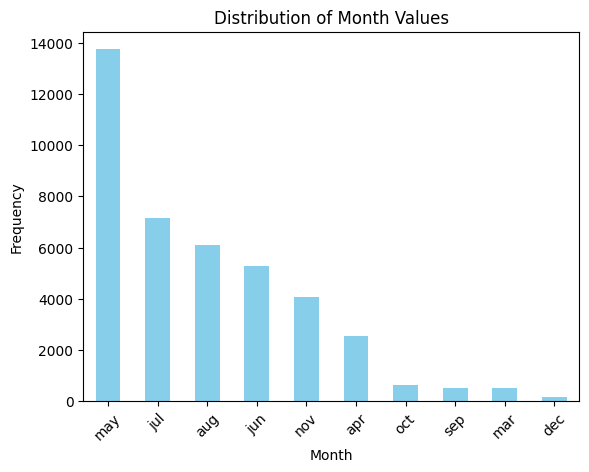

In [ ]:
import matplotlib.pyplot as plt

# Plot the value counts of the 'month' column
data['month'].value_counts().plot(kind='bar', color='skyblue')

# Set labels and title
plt.title('Distribution of Month Values')
plt.xlabel('Month')
plt.ylabel('Frequency')

# Show the plot
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd

data = pd.get_dummies(data, columns=['month'], drop_first=False)

# Display the transformed data to check the result
print(data.head())

        age day_of_week  duration  campaign  pdays  previous     poutcome  \
0  0.750000         mon       261         1    999         0  nonexistent   
1  0.769231         mon       149         1    999         0  nonexistent   
2  0.384615         mon       226         1    999         0  nonexistent   
3  0.442308         mon       151         1    999         0  nonexistent   
4  0.750000         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  ...  month_apr  month_aug  \
0           1.1          93.994          -36.4  ...      False      False   
1           1.1          93.994          -36.4  ...      False      False   
2           1.1          93.994          -36.4  ...      False      False   
3           1.1          93.994          -36.4  ...      False      False   
4           1.1          93.994          -36.4  ...      False      False   

  month_dec  month_jul  month_jun  month_mar  month_may  month_nov  month_

### **11.month - Last contact month (categorical).**

In [ ]:
data["day_of_week"].value_counts()

,count
day_of_week,
thu,8522
mon,8426
wed,8052
tue,7980
fri,7739


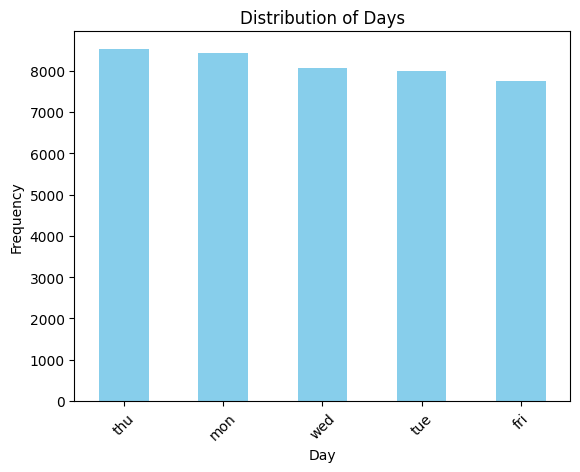

In [ ]:
import matplotlib.pyplot as plt

# Plot the value counts of the 'day_of_week' column
data['day_of_week'].value_counts().plot(kind='bar', color='skyblue')

# Set labels and title
plt.title('Distribution of Days')
plt.xlabel('Day')
plt.ylabel('Frequency')

# Show the plot
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Drop the 'day_of_week' column in-place
data.drop(columns=['day_of_week'], inplace=True)

# Verify if the column is removed
print(data.head())

        age  duration  campaign  pdays  previous     poutcome  emp.var.rate  \
0  0.750000       261         1    999         0  nonexistent           1.1   
1  0.769231       149         1    999         0  nonexistent           1.1   
2  0.384615       226         1    999         0  nonexistent           1.1   
3  0.442308       151         1    999         0  nonexistent           1.1   
4  0.750000       307         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  ...  month_apr month_aug  \
0          93.994          -36.4      4.857  ...      False     False   
1          93.994          -36.4      4.857  ...      False     False   
2          93.994          -36.4      4.857  ...      False     False   
3          93.994          -36.4      4.857  ...      False     False   
4          93.994          -36.4      4.857  ...      False     False   

   month_dec  month_jul  month_jun  month_mar  month_may  month_nov  \
0      False   

### **12.duration - Last contact duration in seconds (numeric).**

In [ ]:
data["duration"].value_counts()

,count
duration,
85,168
136,167
90,167
73,166
124,163
...,...
1275,1
1473,1
1432,1


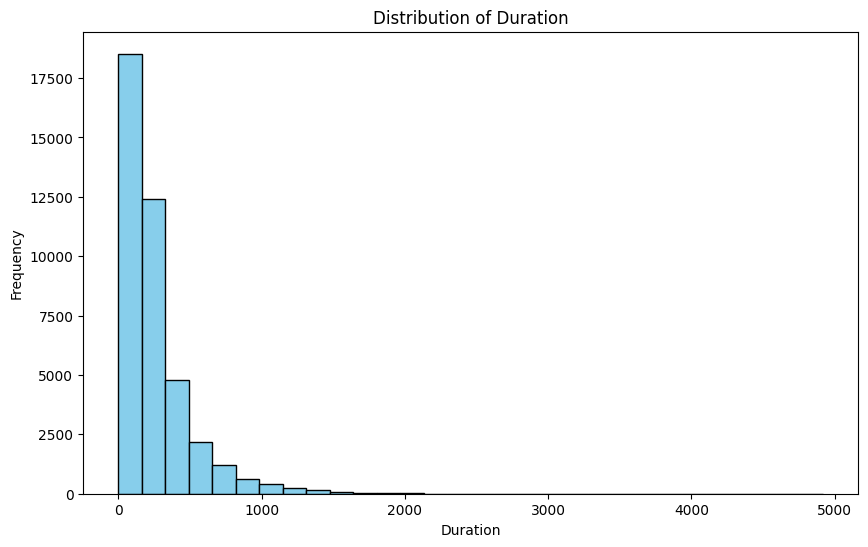

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of the 'duration' column
plt.figure(figsize=(10, 6))
plt.hist(data['duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Reshape the data as it is a single column
scaler = MinMaxScaler()
data['duration'] = scaler.fit_transform(data[['duration']])

# Check the result
print(data[['duration']].head())

   duration
0  0.053070
1  0.030297
2  0.045954
3  0.030704
4  0.062424


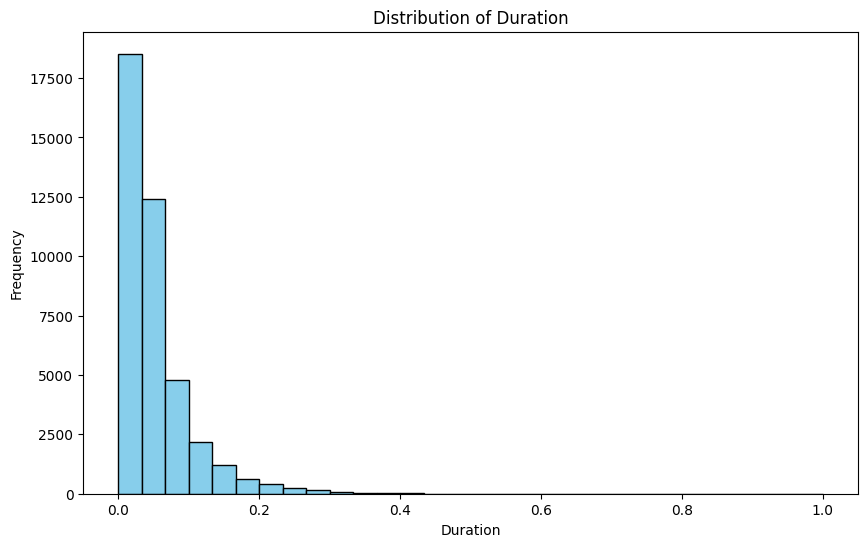

In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of the 'duration' column
plt.figure(figsize=(10, 6))
plt.hist(data['duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

### **13.campaign - Number of contacts in this campaign (numeric)**

In [ ]:
data["campaign"].value_counts()

,count
campaign,
1,17388
2,10444
3,5300
4,2631
5,1594
6,970
7,624
8,396
9,280


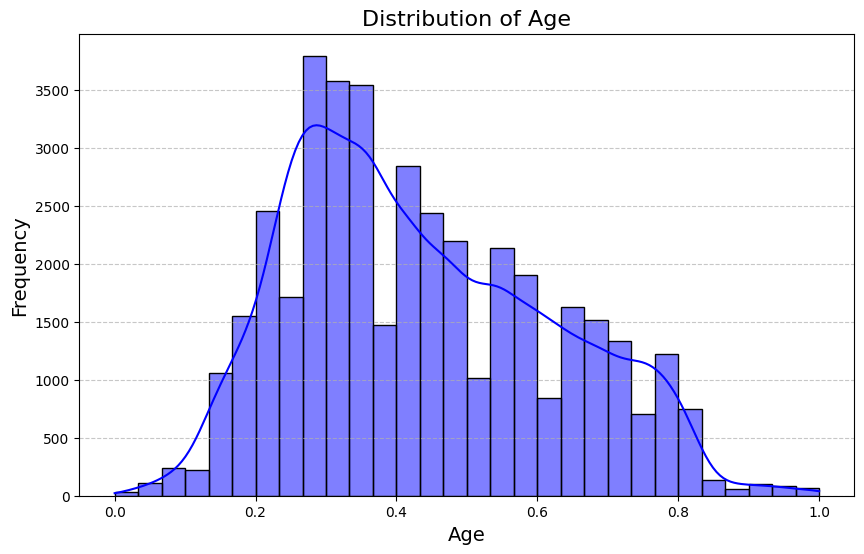

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True, color='blue')  # KDE adds a smooth curve
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Reshape the data as it is a single column
scaler = MinMaxScaler()
data['campaign'] = scaler.fit_transform(data[['campaign']])

# Check the result
print(data[['campaign']].head())

   campaign
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0


### **14.pdays - Days passed since the last contact in a previous campaign (numeric, -1 for no previous contact).**

In [ ]:
data["pdays"].value_counts()

,count
pdays,
999,39302
3,399
6,382
4,111
9,60
2,60
12,56
7,55
10,51


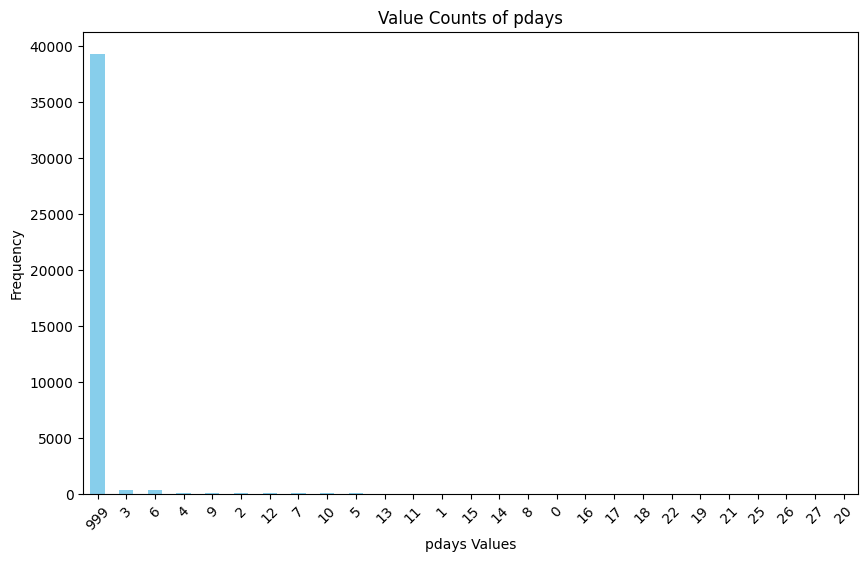

In [ ]:
import matplotlib.pyplot as plt

# Get the value counts of the 'pdays' column
pdays_counts = data["pdays"].value_counts()

# Plot the result
pdays_counts.plot(kind='bar', figsize=(10,6), color='skyblue')

# Adding labels and title
plt.xlabel('pdays Values')
plt.ylabel('Frequency')
plt.title('Value Counts of pdays')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Drop the 'pdays' column
# data = data.drop(columns=['pdays'])
# print(data.head())

### **15.previous - Number of contacts before the current campaign (numeric).**

In [ ]:
data["previous"].value_counts()

,count
previous,
0,35296
1,4439
2,700
3,200
4,61
5,18
6,4
7,1


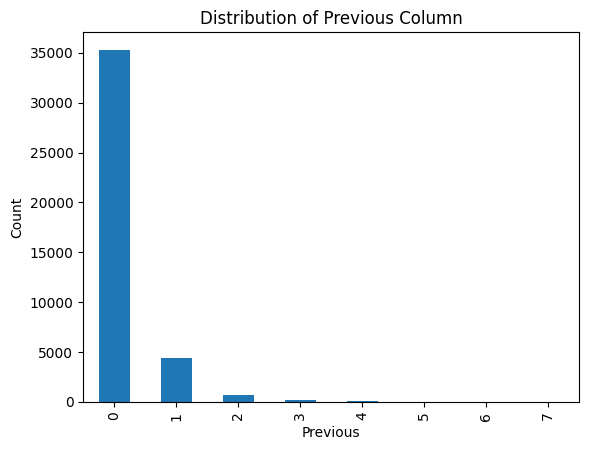

In [ ]:
import matplotlib.pyplot as plt

# Plot the value counts for the 'previous' column
data['previous'].value_counts().sort_index().plot(kind='bar')

# Adding labels and title
plt.xlabel('Previous')
plt.ylabel('Count')
plt.title('Distribution of Previous Column')

# Show the plot
plt.show()

In [ ]:
# Drop the 'pdays' column
# data = data.drop(columns=['previous'])
# print(data.head())

### **16.poutcome - Outcome of the previous campaign (categorical).**

In [ ]:
data["poutcome"].value_counts()

,count
poutcome,
nonexistent,35296
failure,4141
success,1282


In [ ]:
import pandas as pd

# Perform one-hot encoding on 'poutcome'
one_hot_encoded = pd.get_dummies(data['poutcome'], prefix='poutcome')

# Add the one-hot encoded columns back to the original dataset
data = pd.concat([data, one_hot_encoded], axis=1)

# Display counts for the one-hot encoded columns
print("One-Hot Encoded Counts:")
print(one_hot_encoded.sum())


One-Hot Encoded Counts:
poutcome_failure         4141
poutcome_nonexistent    35296
poutcome_success         1282
dtype: int64


In [ ]:
# Drop the 'poutcome' column
data = data.drop(columns=['poutcome'])

### **17.cons.price.idx - Numeric: Consumer price index.**

In [ ]:
data["cons.price.idx"].value_counts()

,count
cons.price.idx,
93.994,7763
93.918,6685
92.893,5785
93.444,5175
94.465,4374
93.200,3616
93.075,2418
92.963,710
92.201,704


### **18.cons.conf.idx - Numeric: Consumer confidence index.**

In [ ]:
data["cons.conf.idx"].value_counts()

,count
cons.conf.idx,
-36.4,7763
-42.7,6685
-46.2,5785
-36.1,5175
-41.8,4374
-42.0,3616
-47.1,2418
-40.8,710
-31.4,704


### **19.emp.var.rate - Numeric: Employment variation rate.**

In [ ]:
data["emp.var.rate"].value_counts()

,count
emp.var.rate,
1.4,16234
-1.8,9038
1.1,7763
-0.1,3683
-2.9,1591
-3.4,949
-1.7,708
-1.1,593
-3.0,150


### **20.euribor3m - Numeric: Euribor 3-month rate.**

In [ ]:
data["euribor3m"].value_counts()

,count
euribor3m,
4.857,2868
4.962,2613
4.963,2487
4.961,1902
4.856,1210
...,...
3.743,1
3.282,1
3.669,1


### **21.nr.employed - Numeric: Number of employees.**

In [ ]:
data["nr.employed"].value_counts()

,count
nr.employed,
5228.1,16234
5099.1,8457
5191.0,7763
5195.8,3683
5076.2,1591
5017.5,949
4991.6,708
4963.6,593
5008.7,581


### **22.y - Client subscribed to a term deposit? (binary).**

In [ ]:
data["y"].value_counts()

,count
y,
no,36300
yes,4419


In [ ]:
import pandas as pd

data['y'] = data['y'].map({'no': 0, 'yes': 1})

In [ ]:
data["y"].value_counts()

,count
y,
0,36300
1,4419


## **4.2 Encode Categorical Variables**

## **4.3 Feature Engineering**

In [ ]:
data.dtypes

,0
age,float64
duration,float64
campaign,float64
pdays,int64
previous,int64
emp.var.rate,float64
cons.price.idx,float64
cons.conf.idx,float64
euribor3m,float64
nr.employed,float64


### **4.3.1 Feature Extraction (Principal Component Analysis (PCA))**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Create a DataFrame for the relevant columns
data_pca = data[['pdays', 'previous', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']]

# Standardize the data (PCA is sensitive to scale)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_pca)

# Apply PCA - reducing to 1 component
pca = PCA(n_components=1)
pca_result = pca.fit_transform(data_scaled)

# Add the PCA result as a new column in the dataset
data['pca_1'] = pca_result

# Drop the original columns (pdays, previous, and the one-hot encoded columns)
data.drop(columns=['pdays', 'previous', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'], inplace=True)

# Display the first few rows of the updated dataset
print(data.head())


        age  duration  campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
0  0.750000  0.053070       0.0           1.1          93.994          -36.4   
1  0.769231  0.030297       0.0           1.1          93.994          -36.4   
2  0.384615  0.045954       0.0           1.1          93.994          -36.4   
3  0.442308  0.030704       0.0           1.1          93.994          -36.4   
4  0.750000  0.062424       0.0           1.1          93.994          -36.4   

   euribor3m  nr.employed  y  job_admin.  ...  month_aug  month_dec  \
0      4.857       5191.0  0       False  ...      False      False   
1      4.857       5191.0  0       False  ...      False      False   
2      4.857       5191.0  0       False  ...      False      False   
3      4.857       5191.0  0        True  ...      False      False   
4      4.857       5191.0  0       False  ...      False      False   

   month_jul  month_jun  month_mar  month_may  month_nov  month_oct  \
0      False      Fal

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Select the columns for PCA
pca_columns = ['cons.price.idx', 'cons.conf.idx', 'emp.var.rate', 'euribor3m', 'nr.employed']
pca_data = data[pca_columns]

# Step 2: Standardize the data (PCA requires standardization)
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Step 3: Apply PCA
pca = PCA(n_components=1)  # Reduce to 1 component for pca_02
data['pca_02'] = pca.fit_transform(pca_data_scaled)

# Step 4: Drop the original columns
data = data.drop(columns=pca_columns)

# Display the updated data
print(data.head())

        age  duration  campaign  y  job_admin.  job_blue-collar  \
0  0.750000  0.053070       0.0  0       False            False   
1  0.769231  0.030297       0.0  0       False            False   
2  0.384615  0.045954       0.0  0       False            False   
3  0.442308  0.030704       0.0  0        True            False   
4  0.750000  0.062424       0.0  0       False            False   

   job_entrepreneur  job_housemaid  job_management  job_retired  ...  \
0             False           True           False        False  ...   
1             False          False           False        False  ...   
2             False          False           False        False  ...   
3             False          False           False        False  ...   
4             False          False           False        False  ...   

   month_dec  month_jul  month_jun  month_mar  month_may  month_nov  \
0      False      False      False      False       True      False   
1      False      Fals

### **4.3.2 Feature Selection:**

## **4.4 Normalize/Scale Numerical Features**

In [ ]:
data.dtypes

,0
age,float64
duration,float64
campaign,float64
y,int64
job_admin.,bool
job_blue-collar,bool
job_entrepreneur,bool
job_housemaid,bool
job_management,bool
job_retired,bool


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns for normalization
numeric_columns = ['age', 'duration', 'campaign', 'pca_1', 'pca_02']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the selected numeric columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Display the updated data
print(data[numeric_columns].head())


        age  duration  campaign  pca_1    pca_02
0  0.750000  0.053070       0.0    0.0  0.898881
1  0.769231  0.030297       0.0    0.0  0.898881
2  0.384615  0.045954       0.0    0.0  0.898881
3  0.442308  0.030704       0.0    0.0  0.898881
4  0.750000  0.062424       0.0    0.0  0.898881


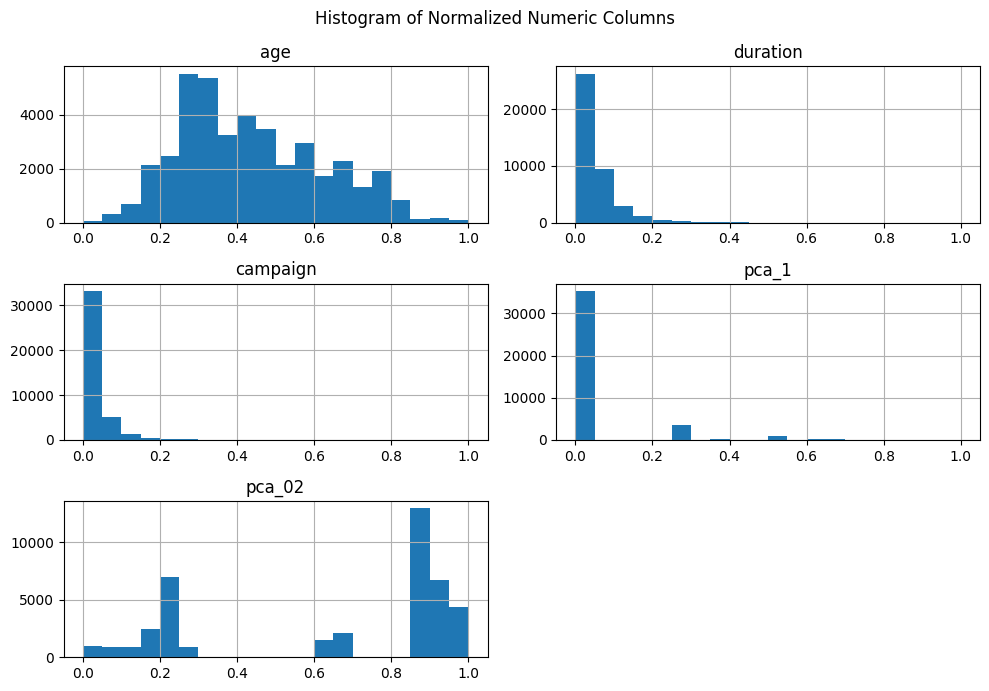

In [ ]:
import matplotlib.pyplot as plt

# Select numeric columns for normalization
numeric_columns = ['age', 'duration', 'campaign', 'pca_1', 'pca_02']

# Plot histograms for each numeric column
data[numeric_columns].hist(bins=20, figsize=(10, 7))
plt.suptitle('Histogram of Normalized Numeric Columns')
plt.tight_layout()
plt.show()


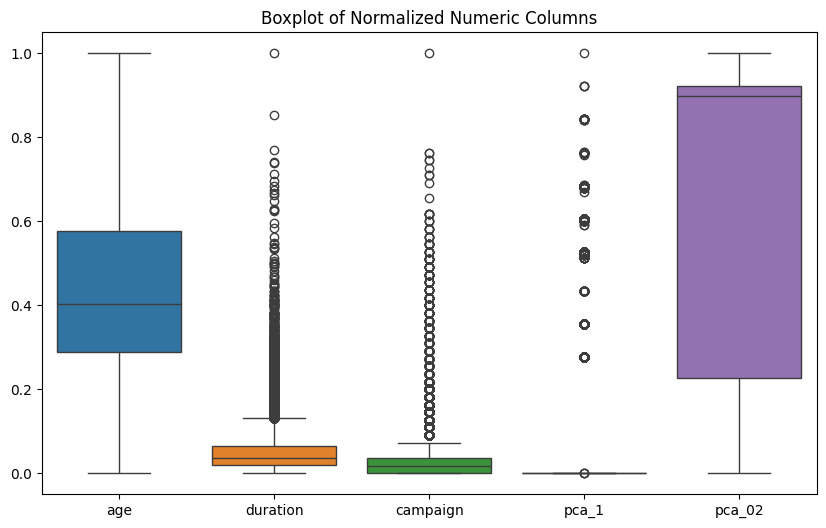

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns for visualization
numeric_columns = ['age', 'duration', 'campaign', 'pca_1', 'pca_02']

# Create a boxplot to visualize distribution and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_columns])
plt.title('Boxplot of Normalized Numeric Columns')
plt.show()


## **4.5 Handle Class Imbalance**

In [ ]:
data.dtypes

,0
age,float64
duration,float64
campaign,float64
y,int64
job_admin.,bool
job_blue-collar,bool
job_entrepreneur,bool
job_housemaid,bool
job_management,bool
job_retired,bool


### **oversampling the minority class**

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
import pandas as pd

X = data.drop('y', axis=1)  # Features
y = data['y']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# First, oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Next, undersample the majority class from the oversampled dataset
undersampler = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = undersampler.fit_resample(X_resampled, y_resampled)

# Alternatively, use SMOTEENN for a hybrid approach (Optional)
smoteenn = SMOTEENN(random_state=42)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)

# Display the class distribution after balancing
from collections import Counter
print("Class distribution after oversampling and undersampling:", Counter(y_balanced))
print("Class distribution after SMOTEENN:", Counter(y_smoteenn))

# You can now train your model on X_balanced or X_smoteenn


Class distribution after oversampling and undersampling: Counter({0: 25410, 1: 25410})
Class distribution after SMOTEENN: Counter({1: 21694, 0: 20559})


### **undersampling the majority class**

## **4.6 Split the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_smoteenn, y_smoteenn, test_size=0.2, random_state=42, stratify=y_smoteenn
)

# Display the shape of the resulting splits
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

# Check the class distribution in the training and testing sets
from collections import Counter
print("Class distribution in training set:", Counter(y_train))
print("Class distribution in testing set:", Counter(y_test))


Training set size: (33802, 40) (33802,)
Testing set size: (8451, 40) (8451,)
Class distribution in training set: Counter({1: 17355, 0: 16447})
Class distribution in testing set: Counter({1: 4339, 0: 4112})


# **5. visualizations**

## **Histogram for a numerical feature**

## **distribution of numerical features**

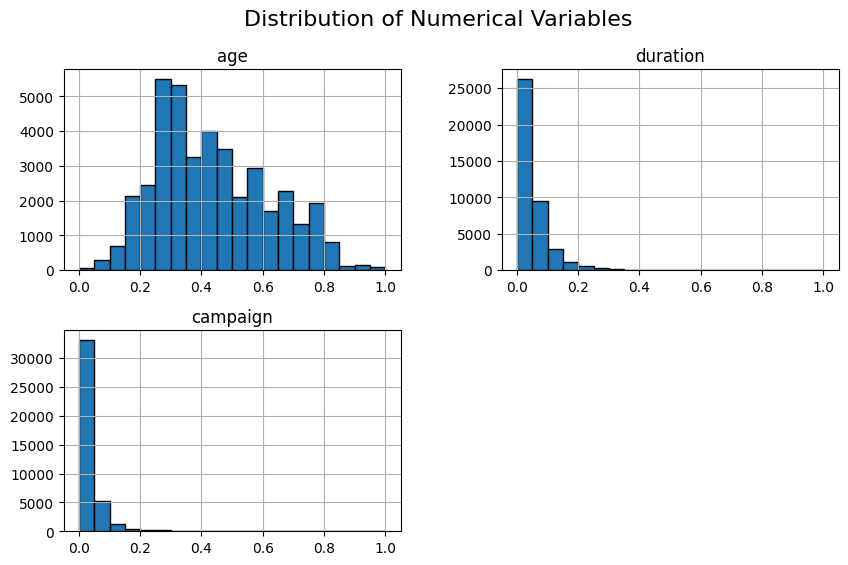

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of numerical features
data[['age', 'duration', 'campaign']].hist(figsize=(10, 6), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Variables', fontsize=16)
plt.show()


## **Boxplot for numerical variables**

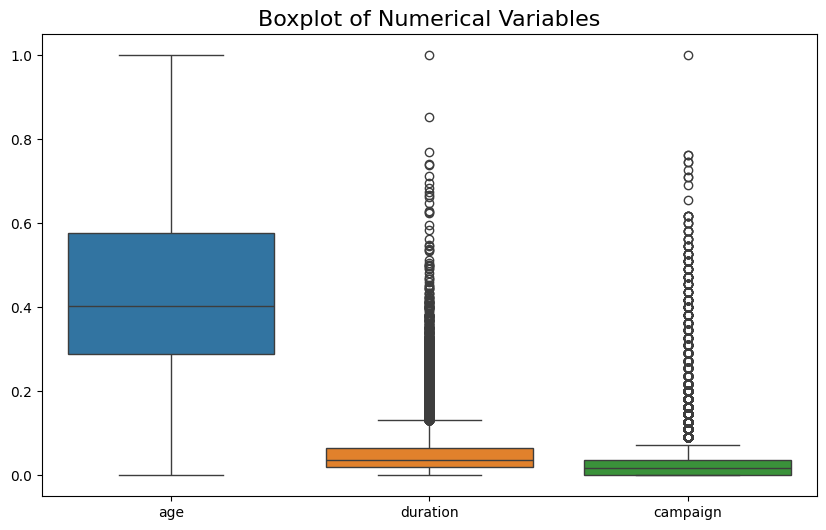

In [ ]:
# Boxplot for numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['age', 'duration', 'campaign']])
plt.title('Boxplot of Numerical Variables', fontsize=16)
plt.show()


## **Bar plot for the target variable**

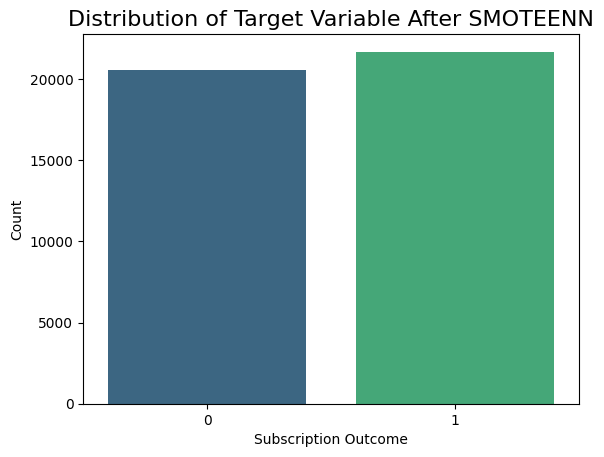

In [ ]:
# Bar plot for the target variable after SMOTEENN
sns.countplot(x=y_smoteenn, palette='viridis')
plt.title('Distribution of Target Variable After SMOTEENN', fontsize=16)
plt.xlabel('Subscription Outcome')
plt.ylabel('Count')
plt.show()


## **correlation matrix**

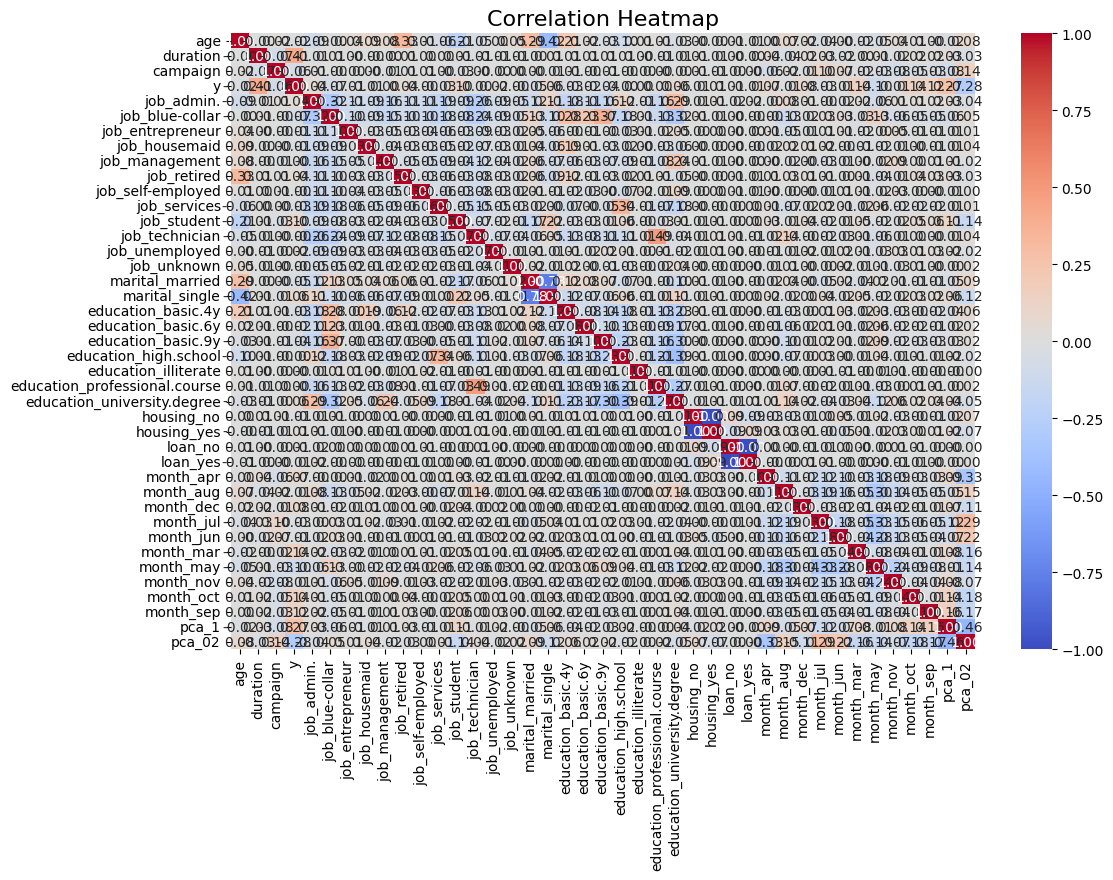

In [ ]:
# Calculate the correlation matrix for numerical features
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


## **Pair plot**

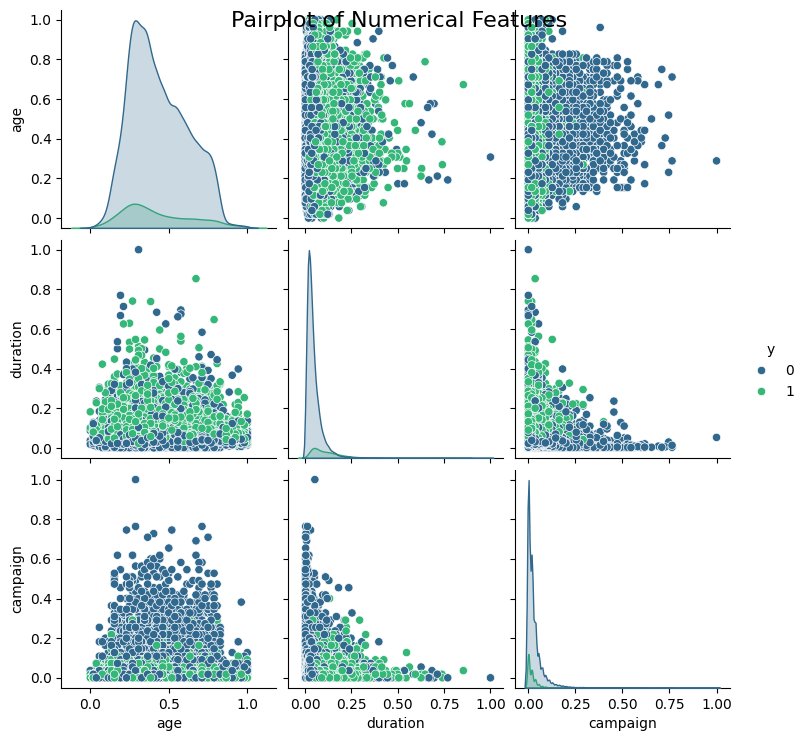

In [ ]:
# Pair plot for continuous variables
sns.pairplot(data[['age', 'duration', 'campaign', 'y']], hue='y', palette='viridis')
plt.suptitle('Pairplot of Numerical Features', fontsize=16)
plt.show()


## **Boxplot of age**

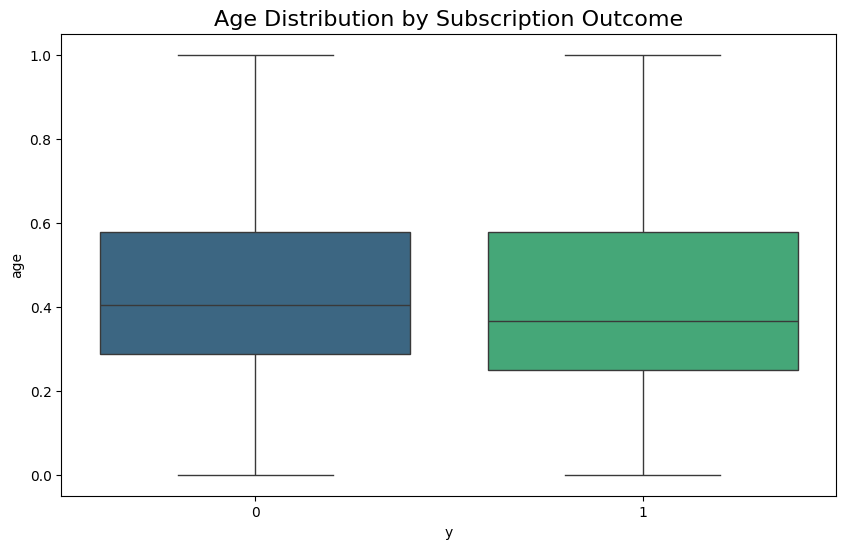

In [ ]:
# Boxplot of age by target variable (y)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='y', y='age', palette='viridis')
plt.title('Age Distribution by Subscription Outcome', fontsize=16)
plt.show()


## **plot for 'job' against 'y'**

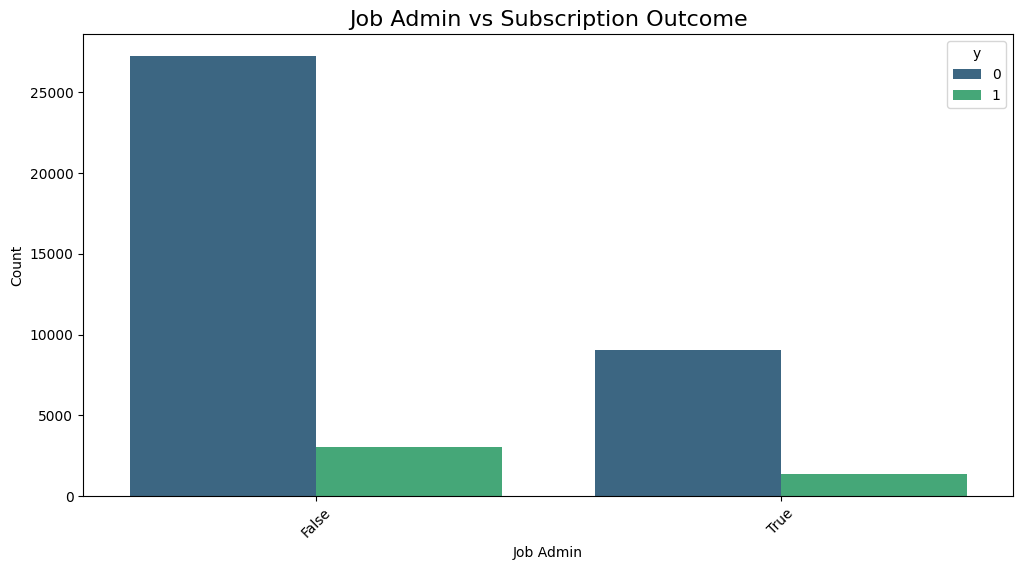

In [ ]:
# Count plot for 'job' against 'y'
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='job_admin.', hue='y', palette='viridis')
plt.title('Job Admin vs Subscription Outcome', fontsize=16)
plt.xlabel('Job Admin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## **Count plot for housing loans**

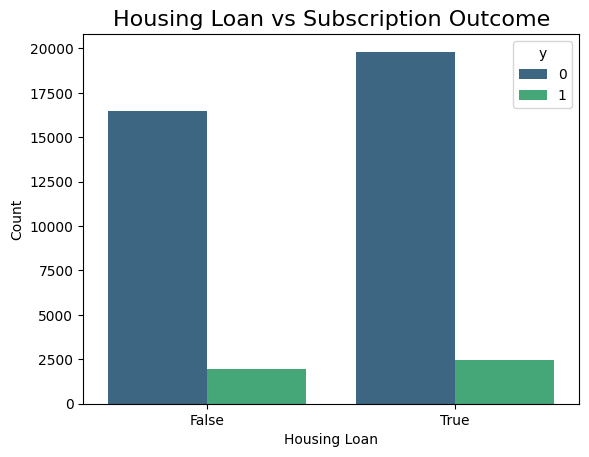

In [ ]:
# Count plot for housing loans
sns.countplot(data=data, x='housing_yes', hue='y', palette='viridis')
plt.title('Housing Loan vs Subscription Outcome', fontsize=16)
plt.xlabel('Housing Loan')
plt.ylabel('Count')
plt.show()


# **7. Random Forest Model**

In [ ]:
X_train.columns

Index(['age', 'duration', 'campaign', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'pca_1', 'pca_02'],
      dtype='object')

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4112
           1       0.97      0.99      0.98      4339

    accuracy                           0.98      8451
   macro avg       0.98      0.98      0.98      8451
weighted avg       0.98      0.98      0.98      8451



# **8. Neural Network Model**

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score

# Define the Neural Network architecture
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1057/1057 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8098 - loss: 0.4165 - val_accuracy: 0.9445 - val_loss: 0.1626
Epoch 2/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9430 - loss: 0.1619 - val_accuracy: 0.9533 - val_loss: 0.1369
Epoch 3/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9493 - loss: 0.1440 - val_accuracy: 0.9533 - val_loss: 0.1353
Epoch 4/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9484 - loss: 0.1436 - val_accuracy: 0.9458 - val_loss: 0.1359
Epoch 5/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9549 - loss: 0.1272 - val_accuracy: 0.9593 - val_loss: 0.1148
Epoch 6/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9570 - loss: 0.1214 - val_accuracy: 0.9570 - val_loss: 0.1168
Epoch 7/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9594 - loss: 0.1131 - val_accuracy: 0.9630 - val_loss: 0.1070
Epoch 8/10
1057/1057 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9611 - loss: 0.1070 - val_accurac

# **9. Hyperparameter Tuning**

## **9.1 Random Forest Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the parameter grid for Random Forest
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250],           # Number of trees
    'max_depth': [None, 10, 20, 30, 40],                 # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                     # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],                       # Minimum samples required at each leaf node
    'bootstrap': [True, False]                            # Whether to use bootstrapping
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV for faster hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_dist,
                                   n_iter=100,        # Number of random combinations to try
                                   cv=5,              # Number of cross-validation folds
                                   scoring='accuracy',
                                   verbose=2,
                                   n_jobs=-1,         # Use all available CPUs
                                   random_state=42)

# Fit the model using the sampled training data
random_search.fit(X_train, y_train)

# Best parameters and model from the search
print("Best parameters for Random Forest:", random_search.best_params_)
best_rf_model = random_search.best_estimator_

# Predict on the test set using the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the tuned model
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

## **9.2 Neural Network Tuning**

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Function to create the model for KerasClassifier
def create_nn_model(optimizer='adam', activation='relu', units=64):
    model = Sequential([
        Dense(units, activation=activation, input_shape=(X_train.shape[1],)),
        Dense(32, activation=activation),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_nn_model, epochs=10, batch_size=32, verbose=1)

# Define the parameter grid
param_grid = {
    'optimizer': ['adam', 'rmsprop'],  # Optimizer to test
    'activation': ['relu', 'tanh'],    # Activation function to test
    'units': [32, 64, 128],            # Number of units in the first layer
    'batch_size': [16, 32],            # Batch size to test
    'epochs': [10, 20]                 # Number of epochs
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best parameters for Neural Network:", grid_search.best_params_)
print("Best score for Neural Network:", grid_search.best_score_)

# Evaluate on the test set using the best model
best_nn_model = grid_search.best_estimator_

# Predict and evaluate the model
y_pred_nn = (best_nn_model.predict(X_test) > 0.5).astype("int32")
print("Tuned Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))


# **10. Model Evaluation**

## **Random Forest Model - Model Evaluation**

### **1. Classification Report (Precision, Recall, F1-Score, Support)**

In [ ]:
from sklearn.metrics import classification_report

# Evaluate the model with precision, recall, f1-score, and support
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4112
           1       0.97      0.99      0.98      4339

    accuracy                           0.98      8451
   macro avg       0.98      0.98      0.98      8451
weighted avg       0.98      0.98      0.98      8451



### **2. ROC Curve**

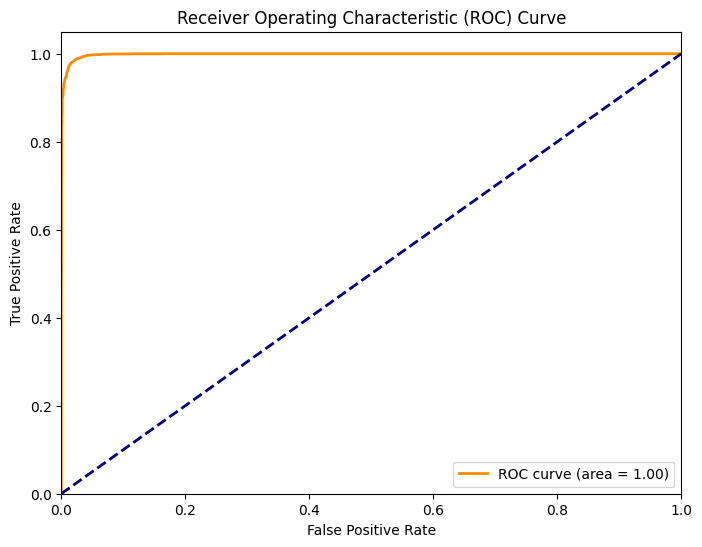

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model with training data
rf_model.fit(X_train, y_train)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### **3. Underfitting and Overfitting Check using Learning Curves**

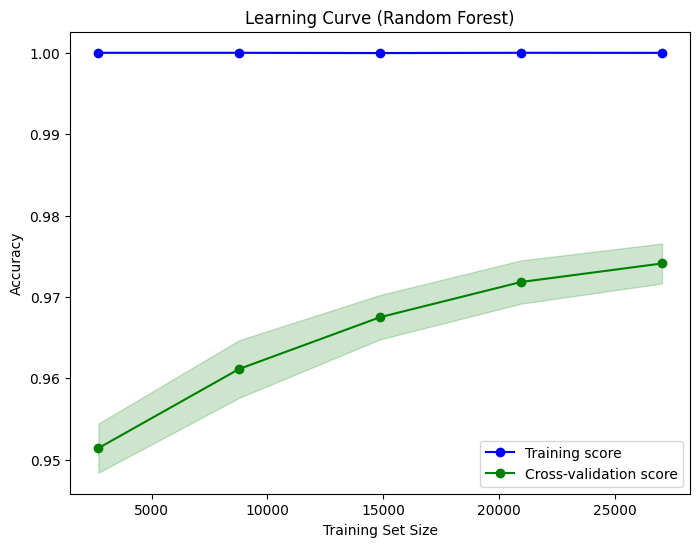

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy')

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Training score')
plt.plot(train_sizes, test_mean, color='green', marker='o', label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve (Random Forest)')
plt.legend(loc='best')
plt.show()


### **4.training and testing error (MSE)**

In [ ]:
from sklearn.metrics import mean_squared_error

# Evaluate training and testing error (MSE)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f"Training Error (MSE): {train_error}")
print(f"Testing Error (MSE): {test_error}")


Training Error (MSE): 0.0
Testing Error (MSE): 0.020352620991598628


### **5.confusion matrix**

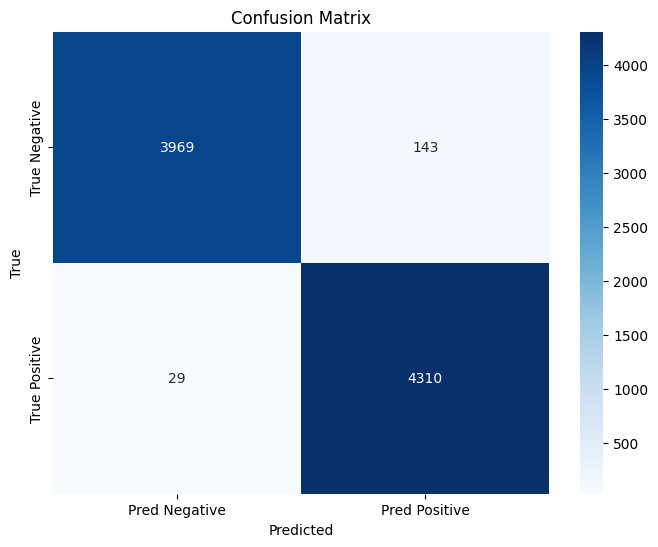

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred Negative', 'Pred Positive'], yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### **6. validation curve**

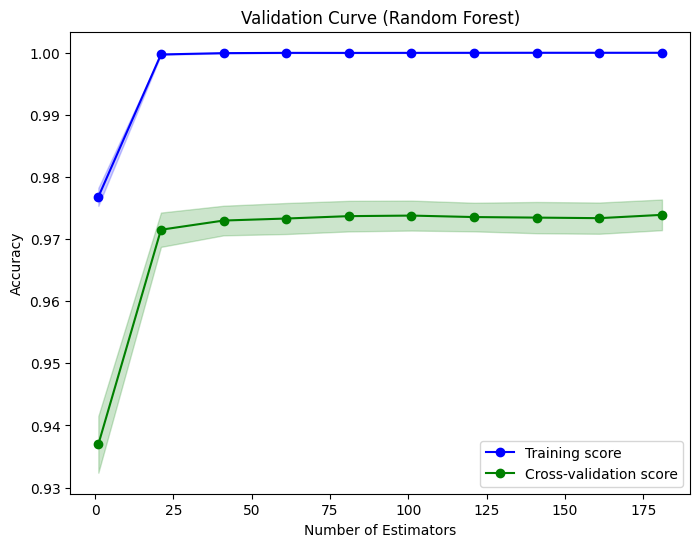

In [ ]:
from sklearn.model_selection import validation_curve

# Example with number of estimators (n_estimators) for Random Forest
param_range = np.arange(1, 201, 20)
train_scores, test_scores = validation_curve(
    rf_model, X_train, y_train, param_name="n_estimators", param_range=param_range, cv=5, scoring='accuracy')

# Calculate mean and standard deviation for the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', label='Training score')
plt.plot(param_range, test_mean, color='green', marker='o', label='Cross-validation score')

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Validation Curve (Random Forest)')
plt.legend(loc='best')
plt.show()


## **Neural Network Model - Model Evaluation**

### **1.Precision, Recall, F1-Score, Suppor**

In [ ]:
# Print classification report for precision, recall, F1-score, and support
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4112
           1       0.94      0.99      0.97      4339

    accuracy                           0.96      8451
   macro avg       0.97      0.96      0.96      8451
weighted avg       0.96      0.96      0.96      8451



### **2.Plot the ROC Curve**

265/265 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


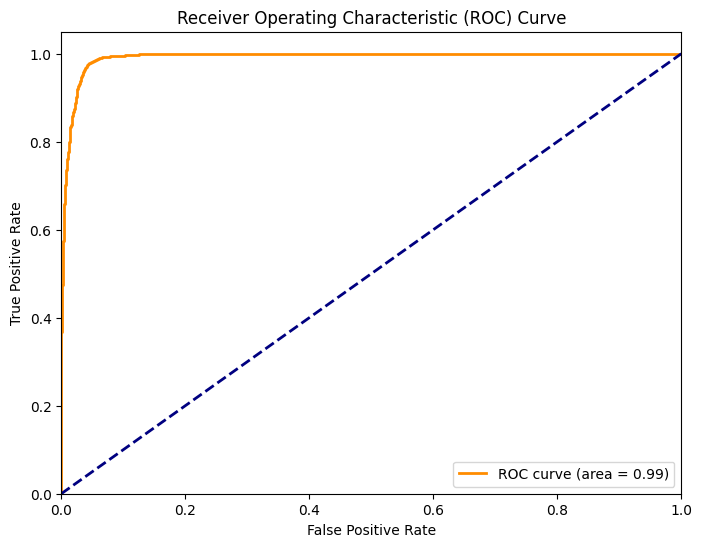

In [ ]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, nn_model.predict(X_test))
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### **3.Visualize Training and Validation Loss**

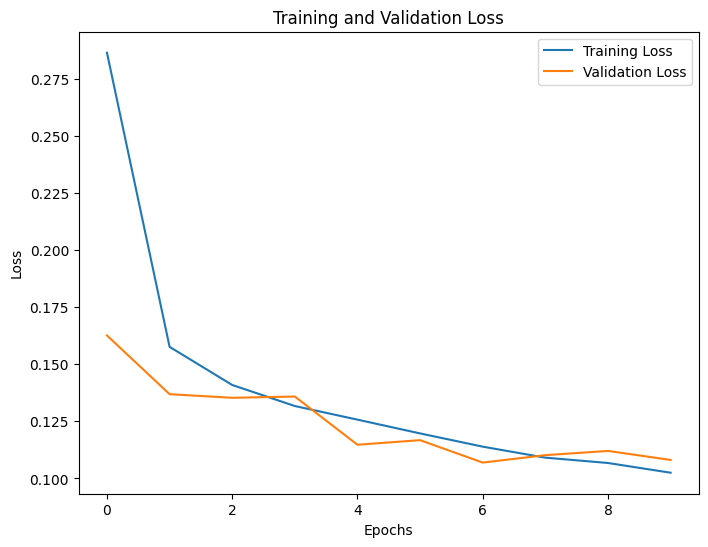

In [ ]:
# Visualize training & validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


### **4.Visualize Training and Validation Accuracy**

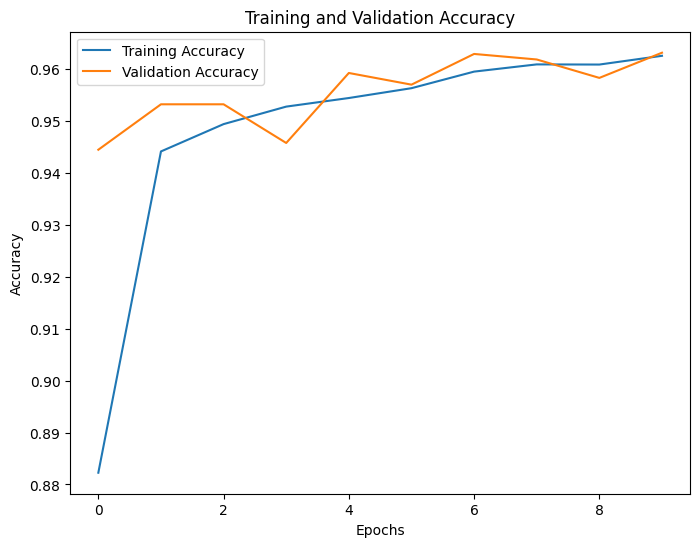

In [ ]:
# Visualize training & validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


### **5.Confusion Matrix**

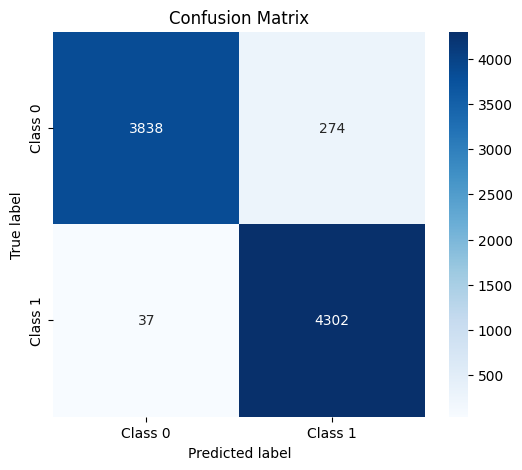

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


# **11. Get predication**

## **Random Forest:**

In [ ]:
import pandas as pd

# New data for prediction (adding 5 more rows with both "yes" and "no" predictions)
new_data = pd.DataFrame({
    'age': [8289, 12204, 11000, 15000, 13000, 12000, 9500],
    'duration': [0.403846, 0.461538, 0.5, 0.6, 0.4, 0.3, 0.45],
    'campaign': [0.014030, 0.064864, 0.01, 0.03, 0.02, 0.05, 0.04],
    'job_admin.': [True, False, False, True, False, True, False],
    'job_blue-collar': [False, False, True, False, True, False, False],
    'job_entrepreneur': [False, False, False, False, False, False, True],
    'job_housemaid': [False, False, False, True, False, False, False],
    'job_management': [False, False, False, False, False, True, False],
    'job_retired': [False, False, False, False, True, False, False],
    'job_self-employed': [False, False, True, False, False, False, False],
    'job_services': [False, False, False, False, True, False, False],
    'job_student': [False, False, False, False, False, True, False],
    'job_technician': [False, False, False, False, False, False, True],
    'job_unemployed': [False, False, False, False, False, False, False],
    'job_unknown': [False, False, False, False, False, False, False],
    'marital_married': [True, False, False, True, False, True, True],
    'marital_single': [False, True, True, False, True, False, False],
    'education_basic.4y': [False, False, True, False, False, True, False],
    'education_basic.6y': [True, False, False, True, False, False, False],
    'education_basic.9y': [False, False, False, False, True, False, False],
    'education_high.school': [False, True, False, False, False, True, False],
    'education_illiterate': [False, False, False, False, False, False, False],
    'education_professional.course': [False, False, False, False, False, False, True],
    'education_university.degree': [True, False, False, False, False, False, False],
    'housing_no': [False, True, False, False, True, True, False],
    'housing_yes': [True, False, True, True, False, False, True],
    'loan_no': [True, False, True, False, False, True, True],
    'loan_yes': [False, True, False, True, True, False, False],
    'month_apr': [False, False, True, False, False, False, True],
    'month_aug': [True, False, False, False, False, True, False],
    'month_dec': [False, False, False, False, True, False, False],
    'month_jul': [False, False, False, True, False, False, False],
    'month_jun': [False, True, False, False, False, False, False],
    'month_mar': [False, False, False, False, False, True, False],
    'month_may': [True, False, False, True, False, False, False],
    'month_nov': [False, False, False, False, False, True, False],
    'month_oct': [False, False, True, False, False, False, False],
    'month_sep': [True, False, False, False, False, False, False],
    'pca_1': [0.275879, 0.275879, 0.3, 0.2, 0.25, 0.4, 0.35],
    'pca_02': [0.201091, 0.226200, 0.3, 0.15, 0.25, 0.3, 0.2]
})

# Make predictions using the trained RandomForest model
new_predictions = rf_model.predict(new_data)

# Map 0 to "No" and 1 to "Yes"
new_predictions_mapped = ['Yes' if pred == 1 else 'No' for pred in new_predictions]

# Add the prediction results to the DataFrame
new_data['Prediction'] = new_predictions_mapped

# Print the data with predictions
print(new_data[['Prediction']])


  Prediction
0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
5        Yes
6        Yes


## **Neural Network:**

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# New data sample (replace with actual new data)
new_data = pd.DataFrame({
    'age': [0.35],
    'duration': [0.04],
    'campaign': [0.05],
    'job_admin.': [False],
    'job_blue-collar': [False],
    'job_entrepreneur': [False],
    'job_housemaid': [False],
    'job_management': [True],
    'job_retired': [False],
    'job_self-employed': [False],
    'job_services': [False],
    'job_student': [True],
    'job_technician': [False],
    'job_unemployed': [False],
    'job_unknown': [False],
    'marital_married': [True],
    'marital_single': [False],
    'education_basic.4y': [False],
    'education_basic.6y': [True],
    'education_basic.9y': [False],
    'education_high.school': [False],
    'education_illiterate': [False],
    'education_professional.course': [False],
    'education_university.degree': [True],
    'housing_no': [False],
    'housing_yes': [True],
    'loan_no': [True],
    'loan_yes': [False],
    'month_apr': [False],
    'month_aug': [True],
    'month_dec': [False],
    'month_jul': [False],
    'month_jun': [False],
    'month_mar': [False],
    'month_may': [True],
    'month_nov': [False],
    'month_oct': [False],
    'month_sep': [False],
    'pca_1': [0.25],
    'pca_02': [0.20]
})

# Preprocess the data (make sure this matches the processing done on the training data)
# For example, ensure boolean values are encoded and scaling is applied if needed.

# Predict using the trained neural network model
prediction = (nn_model.predict(new_data) > 0.5).astype("int32")

# Display the prediction
if prediction == 1:
    print("Prediction: Yes")
else:
    print("Prediction: No")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: Yes


# **12. Model Deployment**

In [ ]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf_model, 'random_forest_model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [ ]:
# Save the trained model
nn_model.save('trained_nn_model.h5')
print("Model saved as 'trained_nn_model.h5'")


Model saved as 'trained_nn_model.h5'
